In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import talib as ta
import datetime, time
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
from tqdm import tqdm_notebook
from scipy.stats import mstats

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [4]:
def calc_exf(df):
    ret = df.ret_p1
    dret = df.dret_p1
    exf = df.mv - df.mv.shift(1) * df.retx_p1
    exf_to_mv = exf / df.mv.shift(1)
    ret_roll_1 = ((ret[::-1]).rolling(1, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_2 = ((ret[::-1]).rolling(2, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_3 = ((ret[::-1]).rolling(3, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_4 = ((ret[::-1]).rolling(4, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_5 = ((ret[::-1]).rolling(5, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_6 = ((ret[::-1]).rolling(6, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_7 = ((ret[::-1]).rolling(7, min_periods=1).apply(np.prod, raw=True)[::-1])
    ret_roll_8 = ((ret[::-1]).rolling(8, min_periods=1).apply(np.prod, raw=True)[::-1])
    
    dret_roll_1 = ((dret[::-1]).rolling(1, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_2 = ((dret[::-1]).rolling(2, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_3 = ((dret[::-1]).rolling(3, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_4 = ((dret[::-1]).rolling(4, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_5 = ((dret[::-1]).rolling(5, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_6 = ((dret[::-1]).rolling(6, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_7 = ((dret[::-1]).rolling(7, min_periods=1).apply(np.prod, raw=True)[::-1])
    dret_roll_8 = ((dret[::-1]).rolling(8, min_periods=1).apply(np.prod, raw=True)[::-1])
    
    # 参考99页，引用7，这里要求的是从1974开始
    dret_roll_1_bar = dret_roll_1.shift(-1).mean()
    dret_roll_2_bar = dret_roll_2.shift(-1).mean()
    dret_roll_3_bar = dret_roll_3.shift(-1).mean()
    dret_roll_4_bar = dret_roll_4.shift(-1).mean()
    dret_roll_5_bar = dret_roll_5.shift(-1).mean()
    
    car1 = ret_roll_1 - dret_roll_1
    car2 = ret_roll_2 - dret_roll_2
    car3 = ret_roll_3 - dret_roll_3
    car4 = ret_roll_4 - dret_roll_4
    car5 = ret_roll_5 - dret_roll_5
    car6 = ret_roll_6 - dret_roll_6
    car7 = ret_roll_7 - dret_roll_7
    car8 = ret_roll_8 - dret_roll_8
    
    wr1 = ret_roll_1 / dret_roll_1
    wr2 = ret_roll_2 / dret_roll_2
    wr3 = ret_roll_3 / dret_roll_3
    wr4 = ret_roll_4 / dret_roll_4
    wr5 = ret_roll_5 / dret_roll_5
    
    wr1_bar = ret_roll_1 / dret_roll_1_bar
    wr2_bar = ret_roll_2 / dret_roll_2_bar
    wr3_bar = ret_roll_3 / dret_roll_3_bar
    wr4_bar = ret_roll_4 / dret_roll_4_bar
    wr5_bar = ret_roll_5 / dret_roll_5_bar
    
    ret_n1 = car1
    ret_n2 = car2 - car1
    ret_n3 = car3 - car2
    ret_n4 = car4 - car3
    ret_n5 = car5 - car4
    ret_n6 = car6 - car5
    ret_n7 = car7 - car6
    ret_n8 = car8 - car7
    
    res = pd.DataFrame({
        'date':df.date,
        'mv':df.mv,
        'retx_p1':df.retx_p1,
        'exf':exf,
        'exf_to_mv':exf_to_mv,
        
        'car1':car1.shift(-1),
        'car3':car3.shift(-1),
        'car5':car5.shift(-1),
        
        'wr1':wr1.shift(-1),
        'wr2':wr2.shift(-1),
        'wr3':wr3.shift(-1),
        'wr4':wr4.shift(-1),
        'wr5':wr5.shift(-1),
        
        'wr1_bar':wr1_bar.shift(-1),
        'wr2_bar':wr2_bar.shift(-1),
        'wr3_bar':wr3_bar.shift(-1),
        'wr4_bar':wr4_bar.shift(-1),
        'wr5_bar':wr5_bar.shift(-1),
        
        'ret_n1':ret_n1.shift(-1),
        'ret_n2':ret_n2.shift(-1),
        'ret_n3':ret_n3.shift(-1),
        'ret_n4':ret_n4.shift(-1),
        'ret_n5':ret_n5.shift(-1),
        'ret_n6':ret_n6.shift(-1),
        'ret_n7':ret_n7.shift(-1),
        'ret_n8':ret_n8.shift(-1)
        
    })
    return res

load data

In [5]:
crsp_fa = pd.read_csv('data/crsp_fa_filtered.zip',
                     parse_dates=['date'], infer_datetime_format=True)

In [6]:
crsp_fa.head()

,date,permno,ret_p1,retx_p1,dret_p1,mv,mv_adj
0,1986-10-31,10000,0.178571,0.178571,1.059979,3002.34375,5796.726244
1,1986-06-30,10001,1.032450,1.000000,1.252963,6033.12500,12067.131553
2,1987-06-30,10001,1.023885,0.959184,1.018842,5822.12500,11205.083735
3,1988-06-30,10001,1.140535,1.063829,0.827947,6200.00000,11459.064979
4,1989-06-30,10001,1.199811,1.120000,1.005611,7007.00000,12326.466763


In [7]:
crsp_filter = crsp_fa.set_index('date')[:'2008']
filter_permno = crsp_filter[(crsp_filter.mv_adj.shift(1) * crsp_filter.retx_p1) >= 5e+4].\
permno.unique().tolist()

crsp_fa_filtered = crsp_fa.set_index('permno').loc[filter_permno].reset_index()

In [26]:
# crsp_fa_filtered = crsp_fa_filtered.assign(year = crsp_fa_filtered.date.dt.year)

In [29]:
# crsp_fa_filtered.head()

In [8]:
test = crsp_fa_filtered[crsp_fa_filtered.permno == 10002]

In [9]:
test.head(10)

,permno,date,ret_p1,retx_p1,dret_p1,mv,mv_adj
0,10002,1986-12-31,1.064515,1.064515,1.005044,14540.625,27694.277996
1,10002,1987-12-31,0.808082,0.808082,0.840417,11750.000,21491.762931
2,10002,1988-12-31,0.837500,0.837500,1.173377,9840.625,17227.102052
3,10002,1989-12-31,0.731343,0.731343,1.084321,7196.875,11976.390245
4,10002,1990-12-31,0.816327,0.816327,0.689016,5875.000,9254.062732
5,10002,1991-12-31,1.200000,1.200000,1.453275,7050.000,10815.811280
6,10002,1992-12-31,1.499999,1.499999,1.401752,12978.000,19282.872353
7,10002,1993-12-31,1.450353,1.430557,1.349054,38612.125,55997.874298
8,10002,1994-12-31,1.039473,1.019418,0.927850,39361.875,55492.135988
9,10002,1995-12-31,1.092129,1.066668,1.373491,42028.000,57642.203439


In [11]:
# 通过上面的预览，查看next return
calc_exf(test)

,date,mv,retx_p1,exf,exf_to_mv,car1,car3,car5,wr1,wr2,...,wr5,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
0,1986-12-31,14540.6250,1.064515,NaN,NaN,-0.032335,-0.574328,-0.585850,0.961525,0.686290,...,0.452834,0.254851,-0.032335,-0.277023,-0.264970,0.241619,-0.253141,-0.187731,-0.196349,0.187721
1,1987-12-31,11750.0000,0.808082,-0.013582,-9.341005e-07,-0.335878,-0.376648,-0.885846,0.713751,0.481404,...,0.503963,0.287287,-0.335878,-0.323941,0.283171,-0.297362,-0.211836,-0.218039,0.225350,-0.709889
2,1988-12-31,9840.6250,0.837500,0.004930,4.195653e-07,-0.352979,-0.369345,-0.494632,0.674470,0.799094,...,0.759094,0.533275,-0.352979,0.202879,-0.219245,-0.077999,-0.047288,0.209663,-0.562271,-0.382646
3,1989-12-31,7196.8750,0.731343,0.006905,7.017218e-07,0.127311,0.065773,0.458322,1.184772,0.978292,...,1.260865,0.923508,0.127311,-0.149048,0.087510,0.171806,0.220743,-0.452110,-0.387604,1.534011
4,1990-12-31,5875.0000,0.816327,-0.002175,-3.021710e-07,-0.253274,-0.137564,-0.538593,0.825722,0.883596,...,0.846217,1.312602,-0.253274,0.016143,0.099567,0.301334,-0.702362,-0.538410,1.722299,0.014003
5,1991-12-31,7050.0000,1.200000,-0.001615,-2.748649e-07,0.098247,0.506804,-0.329636,1.070089,1.150441,...,0.877482,1.756075,0.098247,0.186242,0.222314,-0.446987,-0.389453,1.581327,-0.029270,-1.986530
6,1992-12-31,12978.0000,1.499999,2403.003647,3.408516e-01,0.101299,-0.072728,0.676404,1.075089,1.204426,...,1.280300,1.398892,0.101299,0.154585,-0.328612,-0.272746,1.021879,-0.010450,-1.380160,-0.267716
7,1993-12-31,38612.1250,1.430557,20046.358763,1.544642e+00,0.111624,-0.337573,0.341395,1.120304,0.890807,...,1.202465,1.830647,0.111624,-0.250778,-0.198419,0.679010,-0.000041,-0.995715,-0.171914,-0.380032
8,1994-12-31,39361.8750,1.019418,-0.008577,-2.221426e-07,-0.281362,0.121447,-0.897720,0.795148,0.680830,...,0.640625,1.201406,-0.281362,-0.208056,0.610866,0.011832,-1.030999,-0.144386,-0.427715,0.539492
9,1995-12-31,42028.0000,1.066668,41.937460,1.065433e-03,-0.160509,0.462912,-0.522323,0.856230,1.336853,...,0.688416,0.948213,-0.160509,0.633324,-0.009902,-0.816350,-0.168886,-0.283138,0.438215,-0.506080


In [8]:
tic = time.perf_counter()
result_exf = crsp_fa_filtered.set_index('permno').groupby('permno').apply(calc_exf)
toc = time.perf_counter()
print(toc-tic)

470.0934754


In [13]:
result_exf.head()

,date,mv,retx_p1,exf,exf_to_mv,car1,car3,car5,wr1,wr2,...,wr5,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
permno,,,,,,,,,,,,,,,,,,,,,
10002,1986-12-31,14540.625,1.064515,NaN,NaN,-0.032335,-0.574328,-0.585850,0.961525,0.686290,...,0.452834,0.254851,-0.032335,-0.277023,-0.264970,0.241619,-0.253141,-0.187731,-0.196349,0.187721
10002,1987-12-31,11750.000,0.808082,-0.013582,-9.341005e-07,-0.335878,-0.376648,-0.885846,0.713751,0.481404,...,0.503963,0.287287,-0.335878,-0.323941,0.283171,-0.297362,-0.211836,-0.218039,0.225350,-0.709889
10002,1988-12-31,9840.625,0.837500,0.004930,4.195653e-07,-0.352979,-0.369345,-0.494632,0.674470,0.799094,...,0.759094,0.533275,-0.352979,0.202879,-0.219245,-0.077999,-0.047288,0.209663,-0.562271,-0.382646
10002,1989-12-31,7196.875,0.731343,0.006905,7.017218e-07,0.127311,0.065773,0.458322,1.184772,0.978292,...,1.260865,0.923508,0.127311,-0.149048,0.087510,0.171806,0.220743,-0.452110,-0.387604,1.534011
10002,1990-12-31,5875.000,0.816327,-0.002175,-3.021710e-07,-0.253274,-0.137564,-0.538593,0.825722,0.883596,...,0.846217,1.312602,-0.253274,0.016143,0.099567,0.301334,-0.702362,-0.538410,1.722299,0.014003


In [9]:
res1 = result_exf.copy()
res1 = res1.dropna(subset=['exf_to_mv']) # 只是剔除exf_to_mv中的异常值
# res1 = res1.dropna() # 只要有异常值，就全部剔除，两者差距不是很大
res1 = res1.reset_index().set_index('date')[:'2008'] # 筛选出到08年的数据
# res1 = res1.loc['1973':'2001']
# 可以自行调整limits大小
res1.exf_to_mv = mstats.winsorize(res1.exf_to_mv, limits=[0.05, 0.05]) # 这里也可以调整

per1 = np.linspace(0,1,11).tolist()
bins = res1.describe(percentiles=per1).exf_to_mv.iloc[4:-1].tolist()
bins = [bins[0]-1] + bins[1:]
# bins = bins[:-1] + [bins[-1]-1]
res1.groupby(pd.cut(res1.exf_to_mv,bins, right=True)).mean().drop(['mv', 'retx_p1', 'exf', 'permno'], axis=1)

,exf_to_mv,car1,car3,car5,wr1,wr2,wr3,wr4,wr5,wr1_bar,...,wr4_bar,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
exf_to_mv,,,,,,,,,,,,,,,,,,,,,
"(-1.066, -0.0261]",-0.054192,0.053575,0.174042,0.261691,1.055378,1.109198,1.135318,1.147445,1.163329,1.038437,...,1.105330,1.124417,0.053575,0.070476,0.049991,0.036647,0.051002,0.066103,0.022210,0.015240
"(-0.0261, -0.00114]",-0.010753,0.043743,0.125188,0.237322,1.044434,1.071405,1.096150,1.113954,1.134676,1.050888,...,1.101759,1.134472,0.043743,0.036998,0.044446,0.049843,0.062291,0.065971,0.034715,0.043601
"(-0.00114, 5.6e-08]",-0.000092,0.046179,0.116728,0.191206,1.046835,1.075012,1.093042,1.113327,1.128983,1.069877,...,1.162736,1.193048,0.046179,0.041056,0.029493,0.039997,0.034481,-0.020102,-0.010062,0.009573
"(5.6e-08, 0.000466]",0.000060,0.046644,0.099444,0.137528,1.039890,1.067257,1.074647,1.085086,1.100556,1.070315,...,1.138012,1.165843,0.046644,0.044281,0.008519,0.015483,0.022601,-0.003198,0.180046,-0.079673
"(0.000466, 0.00379]",0.001938,0.038457,0.072648,0.101784,1.029696,1.054977,1.056886,1.052807,1.056119,1.059876,...,1.069720,1.085533,0.038457,0.033661,0.000530,0.007193,0.021943,0.022210,0.025695,0.001909
"(0.00379, 0.0102]",0.006644,0.036466,0.069184,0.087717,1.029551,1.050212,1.054043,1.048750,1.054752,1.037722,...,1.031818,1.042518,0.036466,0.028978,0.003741,-0.003239,0.021772,0.003354,0.001540,0.005266
"(0.0102, 0.0236]",0.015937,0.023408,0.045566,0.079703,1.018091,1.036686,1.036312,1.042392,1.048517,1.018724,...,1.017422,1.022294,0.023408,0.021842,0.000315,0.015596,0.018541,-0.001219,-0.011214,0.024606
"(0.0236, 0.0625]",0.039091,0.021788,0.043701,0.004793,1.015407,1.027671,1.030763,1.020049,1.008651,1.011254,...,0.988067,0.974452,0.021788,0.020245,0.001669,-0.018899,-0.020010,0.008435,-0.014993,-0.020619
"(0.0625, 0.205]",0.117770,-0.007937,-0.048625,-0.113072,0.986125,0.978600,0.969212,0.955532,0.945136,0.983683,...,0.931473,0.923051,-0.007937,-0.017205,-0.023482,-0.031059,-0.033387,-0.032453,-0.008529,0.021781


In [10]:
res1_grouped = res1.groupby(pd.cut(res1.exf_to_mv,bins, right=True)).\
mean().drop(['mv', 'retx_p1', 'exf', 'permno'], axis=1)
res1_grouped.index = list(range(1,11))

In [11]:
res1_grouped.index.name = 'decile'

In [12]:
res1_grouped

,exf_to_mv,car1,car3,car5,wr1,wr2,wr3,wr4,wr5,wr1_bar,...,wr4_bar,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
decile,,,,,,,,,,,,,,,,,,,,,
1,-0.054192,0.053575,0.174042,0.261691,1.055378,1.109198,1.135318,1.147445,1.163329,1.038437,...,1.105330,1.124417,0.053575,0.070476,0.049991,0.036647,0.051002,0.066103,0.022210,0.015240
2,-0.010753,0.043743,0.125188,0.237322,1.044434,1.071405,1.096150,1.113954,1.134676,1.050888,...,1.101759,1.134472,0.043743,0.036998,0.044446,0.049843,0.062291,0.065971,0.034715,0.043601
3,-0.000092,0.046179,0.116728,0.191206,1.046835,1.075012,1.093042,1.113327,1.128983,1.069877,...,1.162736,1.193048,0.046179,0.041056,0.029493,0.039997,0.034481,-0.020102,-0.010062,0.009573
4,0.000060,0.046644,0.099444,0.137528,1.039890,1.067257,1.074647,1.085086,1.100556,1.070315,...,1.138012,1.165843,0.046644,0.044281,0.008519,0.015483,0.022601,-0.003198,0.180046,-0.079673
5,0.001938,0.038457,0.072648,0.101784,1.029696,1.054977,1.056886,1.052807,1.056119,1.059876,...,1.069720,1.085533,0.038457,0.033661,0.000530,0.007193,0.021943,0.022210,0.025695,0.001909
6,0.006644,0.036466,0.069184,0.087717,1.029551,1.050212,1.054043,1.048750,1.054752,1.037722,...,1.031818,1.042518,0.036466,0.028978,0.003741,-0.003239,0.021772,0.003354,0.001540,0.005266
7,0.015937,0.023408,0.045566,0.079703,1.018091,1.036686,1.036312,1.042392,1.048517,1.018724,...,1.017422,1.022294,0.023408,0.021842,0.000315,0.015596,0.018541,-0.001219,-0.011214,0.024606
8,0.039091,0.021788,0.043701,0.004793,1.015407,1.027671,1.030763,1.020049,1.008651,1.011254,...,0.988067,0.974452,0.021788,0.020245,0.001669,-0.018899,-0.020010,0.008435,-0.014993,-0.020619
9,0.117770,-0.007937,-0.048625,-0.113072,0.986125,0.978600,0.969212,0.955532,0.945136,0.983683,...,0.931473,0.923051,-0.007937,-0.017205,-0.023482,-0.031059,-0.033387,-0.032453,-0.008529,0.021781


In [13]:
bar_cols = ['ret_n1', 'ret_n2', 'ret_n3', 'ret_n4', 'ret_n5', 'ret_n6',
       'ret_n7', 'ret_n8']

In [14]:
res1_grouped_transfer = res1_grouped[bar_cols].T
res1_grouped_transfer = res1_grouped_transfer.assign(decile_diff = \
                        res1_grouped_transfer[1]-res1_grouped_transfer[10])

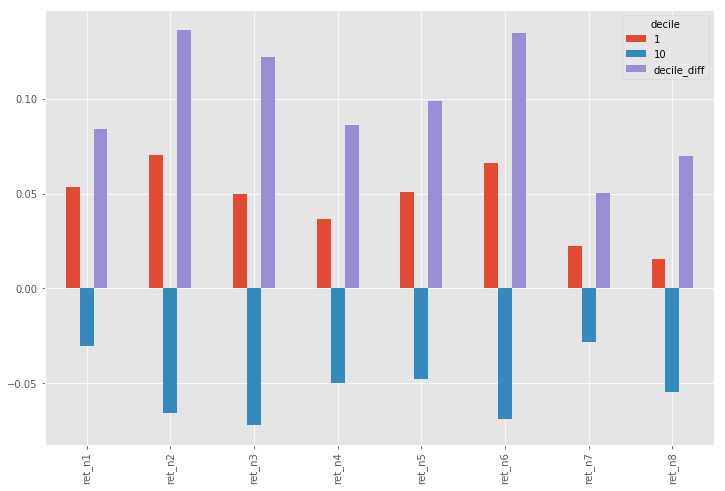

In [15]:
res1_grouped_transfer[[1, 10, 'decile_diff']].plot.bar();

为了按照每年进行分组计算，先添加year字段

In [16]:
# 进行复制操作，避免破坏数据
res1 = result_exf.copy()
res1 = res1.reset_index().set_index('date')[:'2008'] # 筛选出到08年的数据
res1.exf_to_mv = mstats.winsorize(res1.exf_to_mv, limits=[0.05, 0.05]) 

In [17]:
# 如果exf_to_mv中有异常值，则drop这一行数据
res1 = res1.dropna(subset=['exf_to_mv'])
# res1 = res1.dropna()

In [18]:
#重置index, 并添加year字段
res1 = res1.reset_index()
res1 = res1.assign(year = res1.date.dt.year)

In [19]:
res1.head()

,date,permno,mv,retx_p1,exf,exf_to_mv,car1,car3,car5,wr1,...,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8,year
0,1987-12-31,10002,11750.000,0.808082,-0.013582,-9.341005e-07,-0.335878,-0.376648,-0.885846,0.713751,...,0.521566,-0.335878,-0.323941,0.283171,-0.297362,-0.211836,-0.218039,0.225350,-0.709889,1987
1,1988-12-31,10002,9840.625,0.837500,0.004930,4.195653e-07,-0.352979,-0.369345,-0.494632,0.674470,...,0.903230,-0.352979,0.202879,-0.219245,-0.077999,-0.047288,0.209663,-0.562271,-0.382646,1988
2,1989-12-31,10002,7196.875,0.731343,0.006905,7.017218e-07,0.127311,0.065773,0.458322,1.184772,...,1.283781,0.127311,-0.149048,0.087510,0.171806,0.220743,-0.452110,-0.387604,1.534011,1989
3,1990-12-31,10002,5875.000,0.816327,-0.002175,-3.021710e-07,-0.253274,-0.137564,-0.538593,0.825722,...,1.717516,-0.253274,0.016143,0.099567,0.301334,-0.702362,-0.538410,1.722299,0.014003,1990
4,1991-12-31,10002,7050.000,1.200000,-0.001615,-2.748649e-07,0.098247,0.506804,-0.329636,1.070089,...,1.368176,0.098247,0.186242,0.222314,-0.446987,-0.389453,1.581327,-0.029270,-1.986530,1991


In [20]:
def group_calc(g):
#     g.exf_to_mv = mstats.winsorize(g.exf_to_mv, limits=[0.05, 0.05])
    per = np.linspace(0,1,11).tolist()
    bins = g.describe(percentiles=per).exf_to_mv.iloc[4:-1].tolist()
    bins = [bins[0]-1] + bins[1:]
    res = g.groupby(pd.cut(g.exf_to_mv,bins, right=True)).mean().\
    drop(['mv', 'retx_p1', 'exf', 'permno', 'year'], axis=1)
    res.index = list(range(1,11))
    res.index.name = 'decile'
    return res

In [47]:
# year_list = res1.year.sort_values().unique().tolist()

In [21]:
# 按年分组，然后对每一组数据，
res2 = res1.groupby('year').apply(group_calc)

In [22]:
res2

exf_to_mv      car1       car3       car5       wr1       wr2  \
year decile                                                                     
1973 1       1.490950e-02  0.140180  -0.353762  -0.244304  1.217842  0.732748   
     2       2.772924e-02 -0.111225   0.629499  -0.414555  0.852644  1.311016   
     3       5.078518e-02  0.116064  10.731742  23.111763  1.157424  4.418576   
     4                NaN       NaN        NaN        NaN       NaN       NaN   
     5       7.666662e-02  0.289559  -0.400718  -1.060146  1.407576  1.277712   
     6       7.868620e-02  0.042125   0.042125   0.042125  1.056841  1.056841   
     7                NaN       NaN        NaN        NaN       NaN       NaN   
     8       1.097972e-01 -0.398057  -0.988046  -1.561999  0.477406  0.429373   
     9       2.787971e-01 -0.054490   0.338521  -0.044877  0.933341  1.293674   
     10      6.787886e-01 -0.359616  -0.726670  -0.908424  0.446335  0.463983   
1974 1      -2.858978e-02  0.124096   0.524045   1.269920  1.090795  1.189500   
     2      -8.128317e-04  0.056773   0.081364   0.134316  1.038677  1.072497   
     3      -7.267884e-07  0.000733   0.077974  -0.036917  1.003578  1.053401   
     4      -2.781789e-07  0.013377   0.023250  -0.281000  1.005471  1.076944   
     5       1.262199e-08  0.053968   0.279539   0.058788  1.030488  1.073131   
     6       3.215786e-07  0.067018   0.214249   0.149440  1.053021  1.102392   
     7       8.421552e-07  0.061108   0.080927  -0.079120  1.043347  1.065075   
     8       4.366165e-04  0.008233  -0.016576   0.043786  1.010530  1.023408   
     9       8.066604e-03  0.035779  -0.007708  -0.167644  1.022104  1.045833   
     10      1.165712e-01  0.008292   0.052941  -0.261123  1.005480  1.043852   
1975 1      -4.943960e-02  0.087039   0.306182   0.558965  1.065487  1.104083   
     2      -7.721981e-03  0.131337   0.311038   0.452903  1.092284  1.106839   
     3      -3.906077e-05  0.068525  -0.012613  -0.107069  1.051751  1.035526   
     4      -3.532150e-07  0.067371   0.175953   0.280768  1.048970  1.056018   
     5       3.505916e-07 -0.004106  -0.077820  -0.432813  0.996589  0.969927   
     6       1.504735e-05  0.089391   0.095344  -0.160743  1.065724  1.079104   
     7       1.939050e-03  0.038889   0.094576   0.283615  1.028981  1.052806   
     8       1.202590e-02  0.053298   0.043303   0.216858  1.037588  1.011666   
     9       5.268525e-02  0.008269  -0.030656   0.160505  1.010330  0.997763   
     10      3.664755e-01  0.007581  -0.106581  -0.405839  1.006849  0.987145   
...                   ...       ...        ...        ...       ...       ...   
2006 1      -5.476993e-02 -0.029809  -0.051260  -0.048695  0.972327  0.968567   
     2      -2.051701e-02 -0.047658  -0.059510  -0.051719  0.951919  1.025596   
     3      -1.930957e-03  0.012633   0.009442   0.036525  1.013085  1.116686   
     4       1.402442e-03 -0.055902  -0.092322  -0.076488  0.946097  1.015218   
     5       6.133573e-03  0.005675  -0.125139  -0.107231  1.002686  0.939280   
     6       1.319589e-02 -0.032768  -0.135649  -0.103780  0.964736  0.998803   
     7       2.459098e-02  0.001745  -0.099656  -0.049170  0.996764  0.949986   
     8       5.159581e-02 -0.029638  -0.167569  -0.159610  0.967351  0.911575   
     9       1.306270e-01 -0.024693  -0.193822  -0.219686  0.977107  0.853944   
     10      1.479071e+00 -0.019223  -0.228415  -0.258429  0.982742  0.850453   
2007 1      -5.580688e-02  0.001186  -0.050008  -0.010810  1.011995  0.948365   
     2      -2.545531e-02  0.028137  -0.100026  -0.062157  1.056548  0.910526   
     3      -4.680570e-03  0.050679  -0.083311  -0.003438  1.085862  0.954457   
     4       2.692953e-04  0.066566  -0.021962   0.004625  1.116725  1.013861   
     5       2.923201e-03 -0.032723  -0.093513  -0.055448  0.944510  0.920772   
     6       7.598933e-03  0.004304  -0.141206  -0.096419  1.008342  0.869483   
     7       1.595269e-02 -0.029105  -0.146016 

In [23]:
res2.groupby('decile').mean()

,exf_to_mv,car1,car3,car5,wr1,wr2,wr3,wr4,wr5,wr1_bar,...,wr4_bar,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
decile,,,,,,,,,,,,,,,,,,,,,
1,-0.046380,0.058320,0.187645,0.316180,1.058320,1.091340,1.128793,1.151129,1.172453,1.050579,...,1.141827,1.170691,0.058320,0.057380,0.071945,0.058350,0.070185,0.100355,0.033625,0.066790
2,-0.009271,0.032310,0.121786,0.166640,1.032072,1.075130,1.100317,1.099207,1.112564,1.030510,...,1.074920,1.094191,0.032310,0.050640,0.038837,0.011227,0.033627,0.094076,0.008652,0.033648
3,0.000503,0.048320,0.416327,0.877436,1.050930,1.171642,1.269844,1.343426,1.464626,1.044490,...,1.331304,1.448451,0.048320,0.153271,0.214737,0.159583,0.301525,-0.190418,0.028787,-0.027976
4,0.000531,0.041132,0.086031,0.119430,1.037484,1.060813,1.067021,1.073469,1.081335,1.054812,...,1.091468,1.104162,0.041132,0.031124,0.013775,0.016041,0.017358,-0.012894,0.011518,0.014783
5,0.004791,0.041275,0.057708,0.047096,1.035361,1.051595,1.043867,1.037276,1.039136,1.042295,...,1.055734,1.064477,0.041275,0.029487,-0.013055,-0.007693,-0.002918,-0.018038,-0.004910,0.031476
6,0.009279,0.037188,0.072350,0.099338,1.031408,1.057495,1.057576,1.055776,1.062136,1.047743,...,1.071576,1.089999,0.037188,0.037757,-0.002595,-0.000294,0.027282,0.018119,0.035050,0.023015
7,0.016491,0.018401,0.057591,0.067558,1.014100,1.032413,1.043364,1.045204,1.045496,1.023902,...,1.046625,1.052565,0.018401,0.022012,0.017178,0.005612,0.004355,0.036400,-0.007292,0.030147
8,0.042272,0.003651,-0.002640,0.000527,0.995153,1.005797,0.999589,1.002281,1.000770,0.996538,...,1.003652,1.015441,0.003651,0.010589,-0.016880,0.004465,-0.001298,0.000898,-0.036910,0.012854
9,0.121730,-0.000225,-0.014239,-0.044608,0.992620,0.991219,0.987946,0.984745,0.972452,0.993441,...,0.986990,0.987080,-0.000225,-0.005598,-0.008415,-0.006690,-0.023680,-0.026693,-0.005350,0.008018


In [24]:
test2 = res1[res1.year == 1973]
group_calc(test2)

,exf_to_mv,car1,car3,car5,wr1,wr2,wr3,wr4,wr5,wr1_bar,...,wr4_bar,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8
decile,,,,,,,,,,,,,,,,,,,,,
1,0.014909,0.140180,-0.353762,-0.244304,1.217842,0.732748,0.688983,0.648690,0.829888,0.733983,...,0.581999,0.814533,0.140180,-0.375391,-0.118551,-0.092755,0.202213,0.000000,0.000000,0.000000
2,0.027729,-0.111225,0.629499,-0.414555,0.852644,1.311016,1.508020,0.994424,0.798857,0.548735,...,0.738480,0.697568,-0.111225,0.420436,0.320288,-0.637974,-0.406081,0.459497,-0.153147,0.000000
3,0.050785,0.116064,10.731742,23.111763,1.157424,4.418576,7.356770,8.981743,12.473473,0.741581,...,9.202453,12.417172,0.116064,3.922554,6.693123,3.737920,8.642101,-5.777356,-5.197215,2.006507
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.076667,0.289559,-0.400718,-1.060146,1.407576,1.277712,0.764984,0.687138,0.551640,0.832251,...,0.626682,0.501919,0.289559,0.012842,-0.703120,-0.232760,-0.426668,-0.777599,-1.018104,0.000000
6,0.078686,0.042125,0.042125,0.042125,1.056841,1.056841,1.056841,1.056841,1.056841,1.145927,...,1.300029,1.300029,0.042125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.109797,-0.398057,-0.988046,-1.561999,0.477406,0.429373,0.221748,0.277208,0.227510,0.315139,...,0.240218,0.222588,-0.398057,-0.241100,-0.348890,-0.143610,-0.430343,0.124981,-0.936867,0.528343
9,0.278797,-0.054490,0.338521,-0.044877,0.933341,1.293674,1.281799,1.167328,0.966168,0.669709,...,0.867562,0.697549,-0.054490,0.368836,0.024175,-0.135527,-0.247870,0.022691,0.327916,0.121472


In [25]:
test2

,date,permno,mv,retx_p1,exf,exf_to_mv,car1,car3,car5,wr1,...,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8,year
15123,1973-12-31,13370,21804.000,0.383333,3633.997757,0.076667,0.289559,-0.400718,-1.060146,1.407576,...,0.501919,0.289559,0.012842,-0.703120,-0.232760,-0.426668,-0.777599,-1.018104,0.000000,1973
45835,1973-06-30,36003,188263.000,0.421768,74921.227314,0.278797,-0.054490,0.338521,-0.044877,0.933341,...,0.697549,-0.054490,0.368836,0.024175,-0.135527,-0.247870,0.022691,0.327916,0.121472,1973
52831,1973-12-31,41486,32406.000,0.187500,11968.119832,0.109797,-0.398057,-0.988046,-1.561999,0.477406,...,0.222588,-0.398057,-0.241100,-0.348890,-0.143610,-0.430343,0.124981,-0.936867,0.528343,1973
66313,1973-12-31,49913,13474.125,0.637363,1480.662765,0.078686,0.042125,0.042125,0.042125,1.056841,...,1.300029,0.042125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1973
74927,1973-07-31,54893,38872.000,0.573333,1793.308567,0.027729,-0.111225,0.629499,-0.414555,0.852644,...,0.697568,-0.111225,0.420436,0.320288,-0.637974,-0.406081,0.459497,-0.153147,0.000000,1973
100253,1973-12-31,70077,7256.250,0.237676,1277.501168,0.050785,0.116064,10.731742,23.111763,1.157424,...,12.417172,0.116064,3.922554,6.693123,3.737920,8.642101,-5.777356,-5.197215,2.006507,1973
103387,1973-10-31,73235,24820.000,1.454545,7897.280703,0.678789,-0.359616,-0.726670,-0.908424,0.446335,...,0.438135,-0.359616,-0.142751,-0.224302,-0.102077,-0.079678,0.368326,0.683975,5.230823,1973
117643,1973-10-31,76989,194070.625,0.772872,3672.968276,0.014909,0.140180,-0.353762,-0.244304,1.217842,...,0.814533,0.140180,-0.375391,-0.118551,-0.092755,0.202213,0.000000,0.000000,0.000000,1973


In [68]:
# test3 = result_exf.loc[77418]
# test3 = test3.reset_index().set_index('date')
# test3

In [26]:
res2_grouped = res2.groupby('decile').mean()
res2_grouped.index.name = 'decile'

In [27]:
# transfer the matrix
res2_grouped_transfer = res2_grouped[bar_cols].T

In [28]:
res2_grouped_transfer = res2_grouped_transfer.assign(decile_diff = \
                        res2_grouped_transfer[1]-res2_grouped_transfer[10])

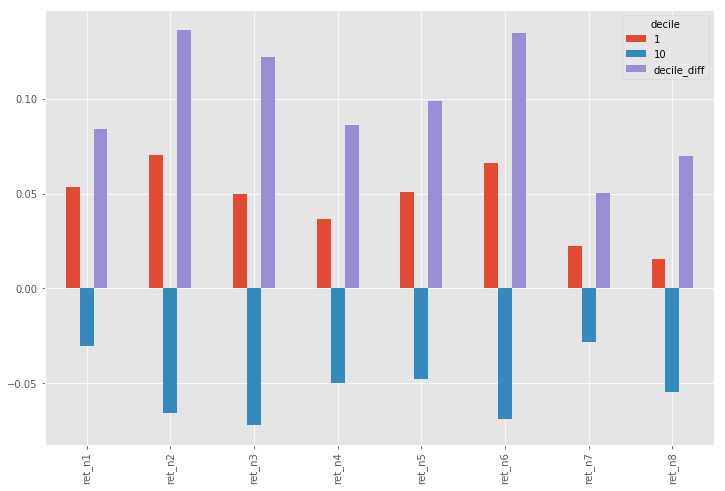

In [29]:
res1_grouped_transfer[[1, 10, 'decile_diff']].plot.bar();

calculate the wealth transfer

In [30]:
# pre_mv represent pre transaction market capitalization
result_exf = result_exf.assign(pre_mv = result_exf.mv.shift(1) * result_exf.retx_p1)

In [31]:
result_exf.head()

,date,mv,retx_p1,exf,exf_to_mv,car1,car3,car5,wr1,wr2,...,wr5_bar,ret_n1,ret_n2,ret_n3,ret_n4,ret_n5,ret_n6,ret_n7,ret_n8,pre_mv
permno,,,,,,,,,,,,,,,,,,,,,
10002,1986-12-31,14540.625,1.064515,NaN,NaN,-0.032335,-0.574328,-0.585850,0.961525,0.686290,...,0.280979,-0.032335,-0.277023,-0.264970,0.241619,-0.253141,-0.187731,-0.196349,0.187721,NaN
10002,1987-12-31,11750.000,0.808082,-0.013582,-9.341005e-07,-0.335878,-0.376648,-0.885846,0.713751,0.481404,...,0.521566,-0.335878,-0.323941,0.283171,-0.297362,-0.211836,-0.218039,0.225350,-0.709889,11750.013582
10002,1988-12-31,9840.625,0.837500,0.004930,4.195653e-07,-0.352979,-0.369345,-0.494632,0.674470,0.799094,...,0.903230,-0.352979,0.202879,-0.219245,-0.077999,-0.047288,0.209663,-0.562271,-0.382646,9840.620070
10002,1989-12-31,7196.875,0.731343,0.006905,7.017218e-07,0.127311,0.065773,0.458322,1.184772,0.978292,...,1.283781,0.127311,-0.149048,0.087510,0.171806,0.220743,-0.452110,-0.387604,1.534011,7196.868095
10002,1990-12-31,5875.000,0.816327,-0.002175,-3.021710e-07,-0.253274,-0.137564,-0.538593,0.825722,0.883596,...,1.717516,-0.253274,0.016143,0.099567,0.301334,-0.702362,-0.538410,1.722299,0.014003,5875.002175


np.where类似于excel中的if函数

WT1

In [37]:
result_exf = result_exf.assign(
    wt1_1 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr1),
         result_exf.exf * (1- result_exf.wr1) * result_exf.mv / result_exf.pre_mv
         ),
    wt1_2 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr2),
         result_exf.exf * (1- result_exf.wr2) * result_exf.mv / result_exf.pre_mv
         ),
    wt1_3 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr3),
         result_exf.exf * (1- result_exf.wr3) * result_exf.mv / result_exf.pre_mv
         ),
    wt1_4 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr4),
         result_exf.exf * (1- result_exf.wr4) * result_exf.mv / result_exf.pre_mv
         ),
    wt1_5 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr5),
         result_exf.exf * (1- result_exf.wr5) * result_exf.mv / result_exf.pre_mv
         ),
)

WT2

In [38]:
result_exf = result_exf.assign(
    wt2_1 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr1_bar),
         result_exf.exf * (1- result_exf.wr1_bar) * result_exf.mv / result_exf.pre_mv
         ),
    wt2_2 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr2_bar),
         result_exf.exf * (1- result_exf.wr2_bar) * result_exf.mv / result_exf.pre_mv
         ),
    wt2_3 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr3_bar),
         result_exf.exf * (1- result_exf.wr3_bar) * result_exf.mv / result_exf.pre_mv
         ),
    wt2_4 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr4_bar),
         result_exf.exf * (1- result_exf.wr4_bar) * result_exf.mv / result_exf.pre_mv
         ),
    wt2_5 = np.where(
         result_exf.exf > 0,
         result_exf.exf * (1- result_exf.wr5_bar),
         result_exf.exf * (1- result_exf.wr5_bar) * result_exf.mv / result_exf.pre_mv
         ),    
)

In [46]:
result_exf.loc[77418].reset_index().set_index('date')[['wt1_5', 'wt2_5']]

,wt1_5,wt2_5
date,,
1992-06-30,NaN,NaN
1993-06-30,-2.556628e+05,-4.142265e+05
1994-06-30,-3.132588e+06,-5.839739e+06
1995-06-30,-4.861862e+06,-8.603506e+06
1996-06-30,-5.258027e+06,-6.517294e+06
1997-06-30,-1.725055e+06,-1.118834e+06
1998-06-30,-1.483403e+06,-5.240130e+05
1999-06-30,1.222192e+07,1.636780e+07
2000-06-30,3.736253e+06,4.943940e+06


In [50]:
result_exf = result_exf.assign(pct_wt1_1 = result_exf.wt1_1 / result_exf.pre_mv,
                               pct_wt1_2 = result_exf.wt1_2 / result_exf.pre_mv,
                               pct_wt1_3 = result_exf.wt1_3 / result_exf.pre_mv,
                               pct_wt1_4 = result_exf.wt1_4 / result_exf.pre_mv,
                               pct_wt1_5 = result_exf.wt1_5 / result_exf.pre_mv,
                               
                               pct_wt2_1 = result_exf.wt2_1 / result_exf.pre_mv,
                               pct_wt2_2 = result_exf.wt2_2 / result_exf.pre_mv,
                               pct_wt2_3 = result_exf.wt2_3 / result_exf.pre_mv,
                               pct_wt2_4 = result_exf.wt2_4 / result_exf.pre_mv,
                               pct_wt2_5 = result_exf.wt2_5 / result_exf.pre_mv,
                              )

In [52]:
result_exf.columns

Index(['date', 'mv', 'retx_p1', 'exf', 'exf_to_mv', 'car1', 'car3', 'car5',
       'wr1', 'wr2', 'wr3', 'wr4', 'wr5', 'wr1_bar', 'wr2_bar', 'wr3_bar',
       'wr4_bar', 'wr5_bar', 'ret_n1', 'ret_n2', 'ret_n3', 'ret_n4', 'ret_n5',
       'ret_n6', 'ret_n7', 'ret_n8', 'pre_mv', 'wt1_1', 'wt1_2', 'wt1_3',
       'wt1_4', 'wt1_5', 'wt2_1', 'wt2_2', 'wt2_3', 'wt2_4', 'wt2_5',
       'pct_wt1_1', 'pct_wt1_2', 'pct_wt1_3', 'pct_wt1_4', 'pct_wt1_5',
       'pct_wt2_1', 'pct_wt2_2', 'pct_wt2_3', 'pct_wt2_4', 'pct_wt2_5'],
      dtype='object')

In [53]:
# wt columns
wt_cols = ['wt1_1', 'wt1_2', 'wt1_3',
       'wt1_4', 'wt1_5', 'wt2_1', 'wt2_2', 'wt2_3', 'wt2_4', 'wt2_5',
       'pct_wt1_1', 'pct_wt1_2', 'pct_wt1_3', 'pct_wt1_4', 'pct_wt1_5',
       'pct_wt2_1', 'pct_wt2_2', 'pct_wt2_3', 'pct_wt2_4', 'pct_wt2_5']

In [59]:
from scipy.stats import ttest_ind

In [58]:
res_stats = result_exf[wt_cols].describe().T[['mean', 'count']]